## Исследование объявлений о продаже квартир

### Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель исследования
Установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Задачи исследования
- Провести предобработку данных;
- Проведите исследовательский анализ данных.

### Исходные данные
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [5]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

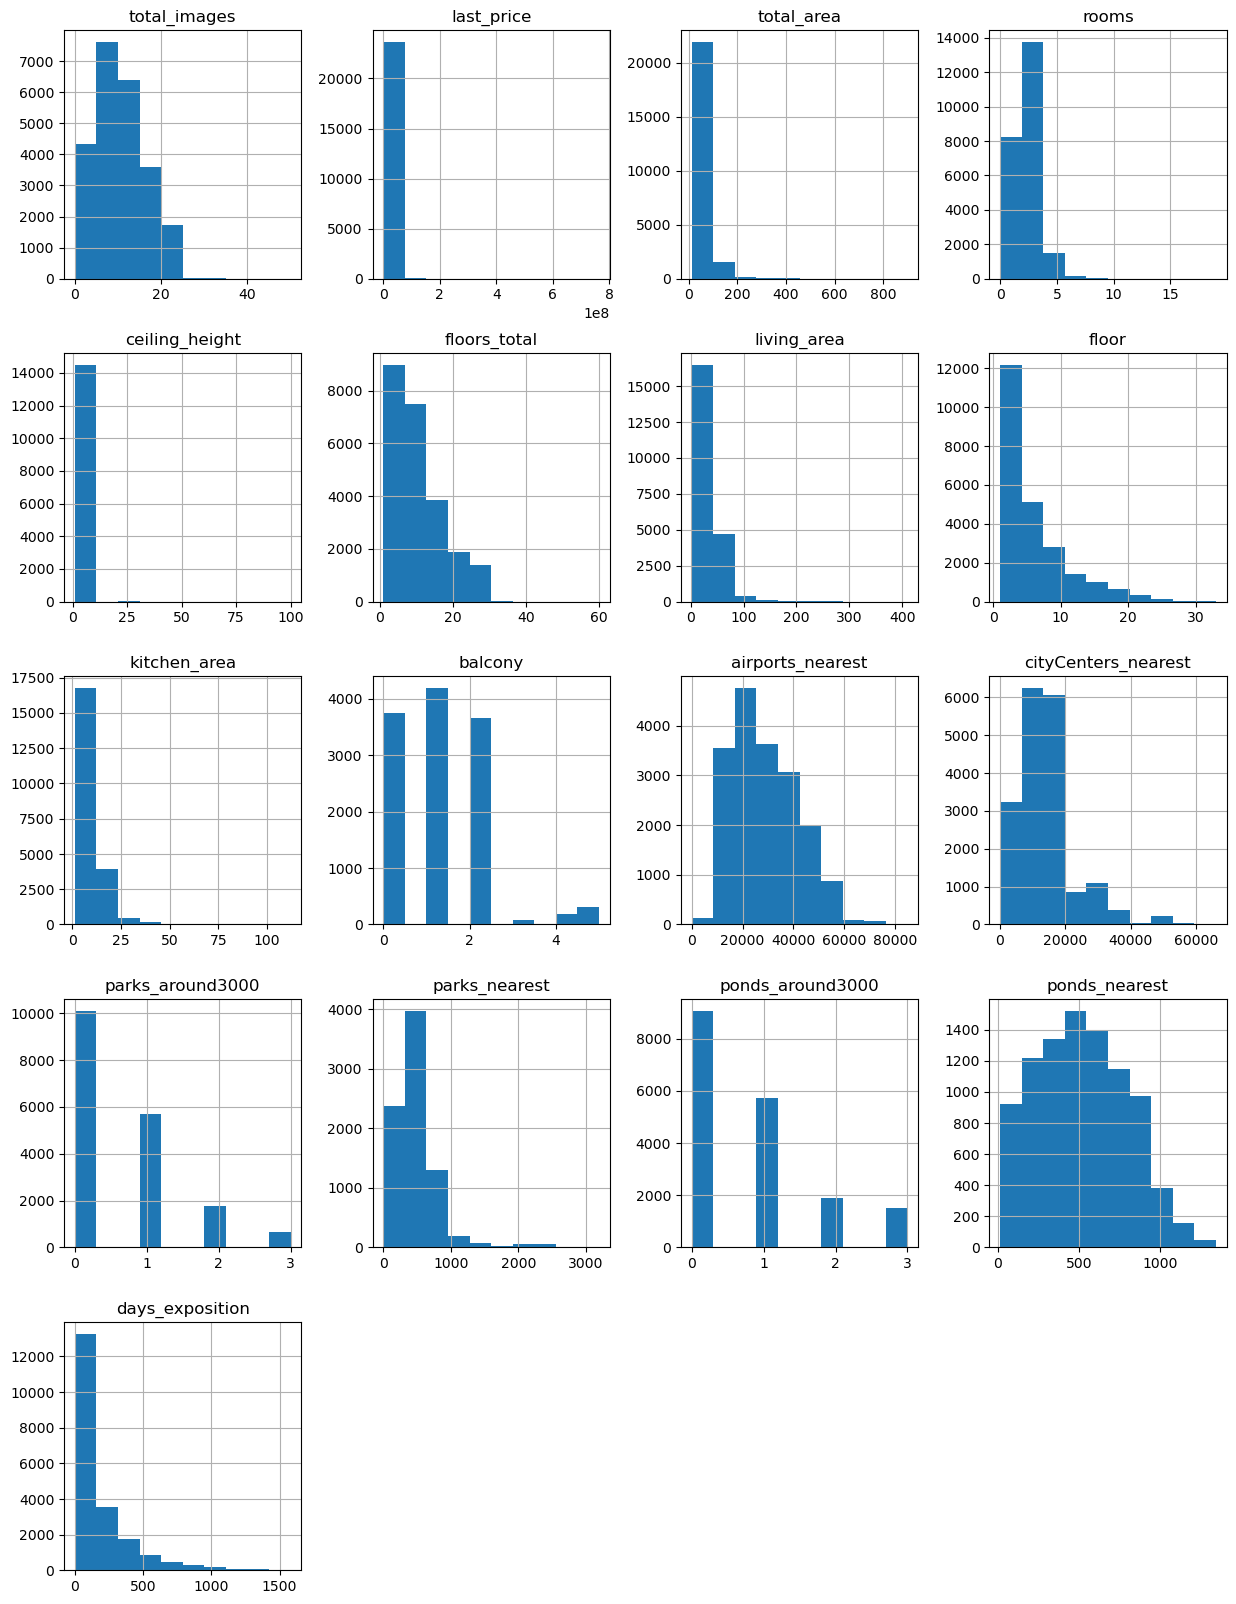

In [7]:
data.hist(figsize=(15, 20))
plt.show()

In [8]:
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

In [9]:
#Посчитаем долю пропущенных значений для каждого столбца.
data.isnull().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**Для столбца "балкон" заменим все пропущенные значения на 0. т.к. если продавец не указал количество, скорее всего балкона нет.**

In [10]:
data['balcony'] = data['balcony'].fillna(0)

**Для столбца `parks_around3000` и `ponds_around3000` также заменим пропущенные значения на 0. по такому же принципу, если не указано количество, скорее всего в радиусе 3км нет ни парков ни водоемов.**

In [11]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)


In [13]:
#перепроверим себя
data.isnull().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000         0.000000
parks_nearest           65.909954
ponds_around3000         0.000000
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**У нас есть дубли среди названий населенного пункта. Уберем их с помощью метода replace**

In [14]:
replace_name = ['посёлок', 'поселок городского типа', 'посёлок городского типа', 'городской поселок', 'городской посёлок']
data.replace(regex=replace_name, value='поселок', inplace=True)
replace_name2 = ['поселок при станции', 'поселок при железнодорожной станции']
data.replace(regex=replace_name2, value='поселок станции', inplace=True)


In [15]:
#выведем уникальные значения.
unique_name = data['locality_name'].dropna().unique().tolist()
unique_name.sort()
unique_name

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Фёдоровское',
 'городской поселок Янино-1',
 'деревня Агалатово',
 'деревня Аро',
 'дерев

**Для разного числа комнат выведем медианное значение жилой площади.**

In [16]:
data.groupby('rooms')['living_area'].agg('median')

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

**У нас есть значение 0 комнат, скорее всего так обозначили квартиры студии.**

In [17]:
#Заполним пропуски в столбце living_area медианными значениями по каждого типа rooms 

data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

In [18]:
#проверим
data.isnull().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              0.000000
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000         0.000000
parks_nearest           65.909954
ponds_around3000         0.000000
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [19]:
#Для разного числа комнат выведем медианное значение площади кухни.
data.groupby('rooms')['kitchen_area'].agg('median')

rooms
0        NaN
1       9.04
2       8.80
3       9.50
4      11.10
5      15.10
6      19.50
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

In [20]:
"""
Заполним пропуски в столбце kitchen_area. 
Жилищный кодекс исключает лоджии, балконы и прочие подсобные помещения из общей площади. поэтому не будет ошибки, 
если площадь кухни мы вычислим как  data['total_area'] - data['living_area']
"""

for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] =  \
    data['total_area'] - data['living_area']     


In [21]:
# проверим
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,45.0,9,NaN,...,114.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [22]:
#поверим еще раз, где у нас сохраняются пропуски
data.isnull().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              0.000000
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000         0.000000
parks_nearest           65.909954
ponds_around3000         0.000000
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [23]:
#Посмотрим на столбец ceiling_height. выведем уникальные значения
data['ceiling_height'].unique()


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

**Есть аномальные значения - 20, 27, 32, 100 и др. Логично предположить, что на самом деле это вещественные значения 2.7, 3.2. Исправим это.**

In [24]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

**Стало лучше, но кто будет жить с потолками в 1 метр? А еще остались потолки выше 4м...
Погуглив, узнаем, что минимальная высота потолков должна быть 2.5 - 2.7 м. Заменим эти значения на медианные.**

In [25]:
data.loc[(data['ceiling_height'] < 2.7) | (data['ceiling_height'] >= 4), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.65, 3.05, 2.75, 2.9 , 2.8 , 3.  , 3.2 , 3.25,
       3.45, 2.77, 2.85, 3.5 , 3.3 , 2.71, 2.73, 2.84, 3.1 , 3.4 , 3.06,
       2.72, 2.78, 2.76, 3.7 , 2.87, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15,
       3.55, 3.16, 3.62, 3.12, 2.74, 2.96, 2.79, 2.95, 2.94, 3.82, 3.54,
       3.53, 2.83, 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 3.57, 2.82, 3.98,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 3.24,
       3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97,
       3.14, 3.22, 3.27, 2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86,
       3.17, 3.28, 3.04, 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 3.39, 3.31,
       3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 2.91, 3.88, 3.29, 3.76, 3.69,
       2.89, 3.58, 3.48, 3.59])

**В столбце ceiling_height есть еще и nan-ы. Заполним и их медианным значением по стоблцу ceiling_height**

In [26]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [27]:
# посмотрим описание столбца, чтобы убедиться, что больше аномальных значений не осталось
data['ceiling_height'].describe()

count    23699.000000
mean         2.724261
std          0.174969
min          2.650000
25%          2.650000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

In [28]:
"""
столбец first_day_exposition переведем на более удобный тип для даты. 
Чтобы в дальнейшем мы могли выявить взаимосвязи с ценой, если они есть.
"""

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [29]:
#некоторые столбцы в формаце float приведем в формат int. в тех столбцах, где пропуски мы решили не заполнять Int64
data = data.astype(
    {
        'last_price':'int',
        'floors_total':'Int64',
        'balcony':'int',
        'airports_nearest':'Int64',
        'cityCenters_nearest':'Int64',
        'parks_around3000':'int',
        'parks_nearest':'Int64',
        'ponds_around3000':'int',
        'ponds_nearest':'Int64',
    })


In [30]:
# У нас 86 пропусков в столбце floors_total. Нам, конечно, их очень жалко, но чтобы они не искажали данные, мы их удалим
data = data.dropna(subset = ['floors_total'])

In [31]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

**У нас остаются пропуски в столбцах:**

    - is_apartment            
    - airports_nearest;
    - cityCenters_nearest;
    - parks_nearest;
    - ponds_nearest;
    - days_exposition.
Данные столбцы оставим с пропусками т.к. эти значения мы не можем заполнить медианными, а для удаления их слишком много.


### Посчитайте и добавьте в таблицу новые столбцы

In [32]:
"""
Посчитаем и добавим в таблицу: цена одного квадратного метра. 
Для этого создадим новый столбец sq_m. Значение сразу приведем к целым числам.
"""
data['sq_m'] = data['last_price'] / data['total_area']
data['sq_m'] = data['sq_m'].astype('int')

In [33]:
#добавим столбец с днем недели публикации объявления
data['number_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [34]:
#выведем первые 5 строк.
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m,number_week
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,поселок Шушары,12817,18603,0,<NA>,0,<NA>,81.0,82920,1
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785,3
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,NaN,...,Санкт-Петербург,28098,6800,2,84,3,234,424.0,408176,4
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000,1


In [35]:
#Добавтм столбец с месяцем публикации объявления и годом публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [36]:
"""
Добавим еще столбец с типом этажа квартиры (значения — «первый», «последний», «другой»). Для этого напишем функцию
"""

def floor_type(row):
    floors_total = row['floors_total'] 
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

In [37]:
data['floor_type'] = data.apply(floor_type, axis=1)


In [38]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m,number_week,year,month,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,1,482,2,755,NaN,120370,3,2019,3,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,0,<NA>,0,<NA>,81.0,82920,1,2018,12,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,1,90,2,574,558.0,92785,3,2015,8,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,NaN,...,2,84,3,234,424.0,408176,4,2015,7,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,2,112,1,48,121.0,100000,1,2018,6,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,0,<NA>,0,<NA>,55.0,95065,0,2018,9,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,0,<NA>,0,<NA>,155.0,99195,3,2017,11,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,NaN,...,0,<NA>,0,<NA>,NaN,110544,3,2019,4,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,...,0,<NA>,0,<NA>,189.0,87454,2,2018,5,другой
9,18,5400000,61.00,2017-02-26,3,2.65,9,43.60,7,NaN,...,0,<NA>,0,<NA>,289.0,88524,6,2017,2,другой


In [39]:
"""
расстояние до центра города в километрах переведем из м в км и округлим до целых значений, и добавим в новый столбец
"""
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('Int64')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m,number_week,year,month,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,482,2,755,NaN,120370,3,2019,3,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,<NA>,0,<NA>,81.0,82920,1,2018,12,первый,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,90,2,574,558.0,92785,3,2015,8,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,NaN,...,84,3,234,424.0,408176,4,2015,7,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,112,1,48,121.0,100000,1,2018,6,другой,8


### Проведите исследовательский анализ данных

Изучим следующие параметры объектов: общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров.

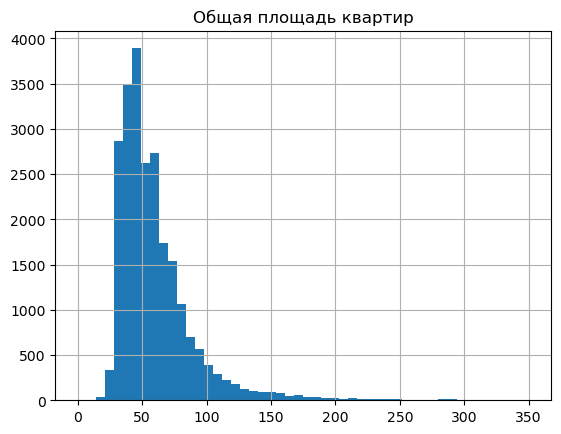

In [43]:
data['total_area'].hist(bins=50, range=(0, 350))
plt.title('Общая площадь квартир')
plt.show()

In [44]:
data.groupby('rooms')['rooms'].agg('count')

rooms
0      194
1     8015
2     7913
3     5795
4     1177
5      325
6      104
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

**По графику можно увидеть, что большинство квартир до 50 кв.м. Сгруппируем количество комнат в квартире. И дейтвительно можем заметить, что чаще всего встречаются объявления с 1 и 2 комнатными квартирами.**

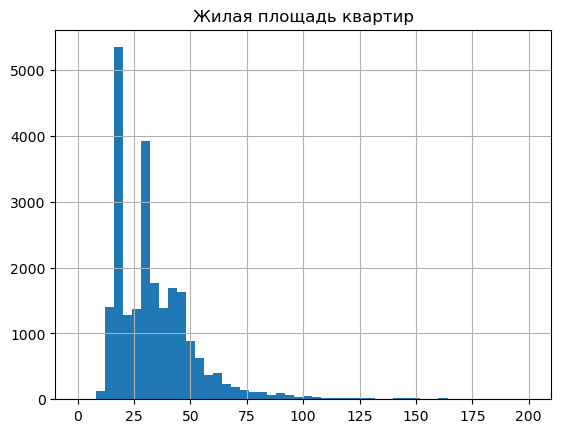

In [45]:
data['living_area'].hist(bins=50, range=(0, 200))
plt.title('Жилая площадь квартир')
plt.show()

In [46]:
data['living_area'].describe() 

count    23613.000000
mean        34.332019
std         21.712677
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

**В графике жилой площади можем заметить 2 пики - чуть меньше 25 кв.м. и 30 кв.м.
По методу describe такие интересные закономерности мы бы пропустилили.**

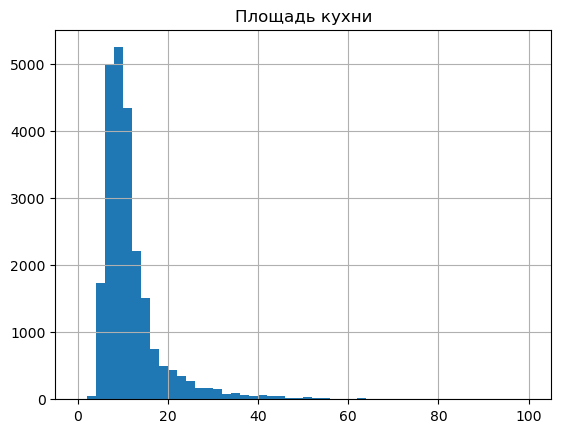

In [47]:
data['kitchen_area'].hist(bins=50, range=(0, 100))
plt.title('Площадь кухни')
plt.show()

**График площади кухни в основном тоже 10 кв.м.**

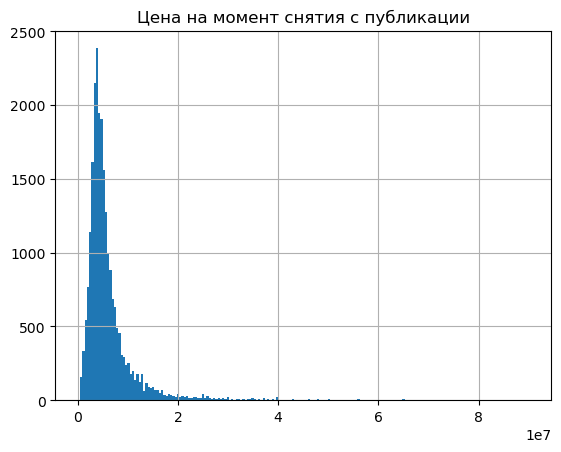

In [48]:
data['last_price'].hist(bins=200, range=(0, 90000000))
plt.title('Цена на момент снятия с публикации')
plt.show()

In [49]:
data['last_price'].describe()


count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**По графику видно, что в основном цены на 3-4 млн.**

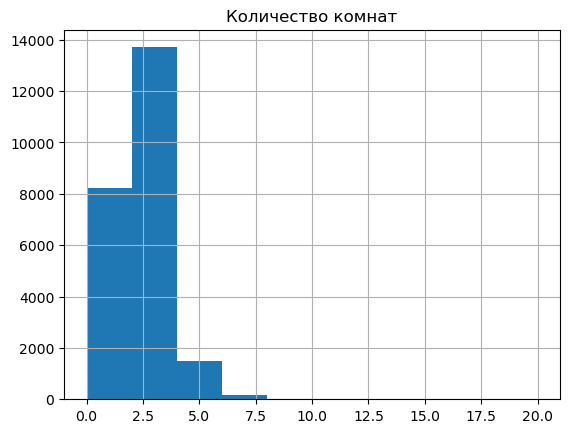

In [50]:
data['rooms'].hist(bins=10, range=(0, 20))
plt.title('Количество комнат')
plt.show()

**Как и подмечали выше, в основном квартиры 1 и 2 комнатные**

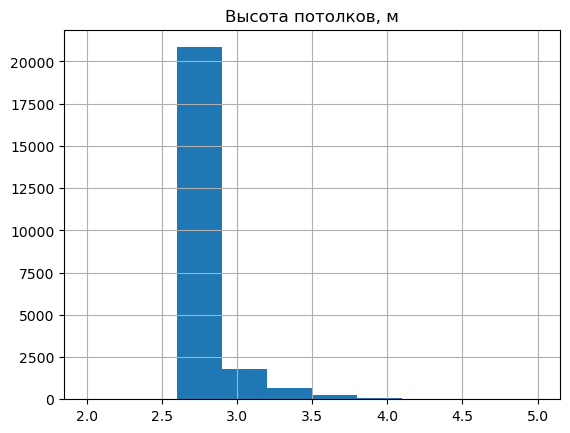

In [51]:
data['ceiling_height'].hist(range=(2, 5))
plt.title('Высота потолков, м')
plt.show()

**Все пололки ниже нормы, мы приводили к медианному значению. Теперь можем отследить это на графике.**

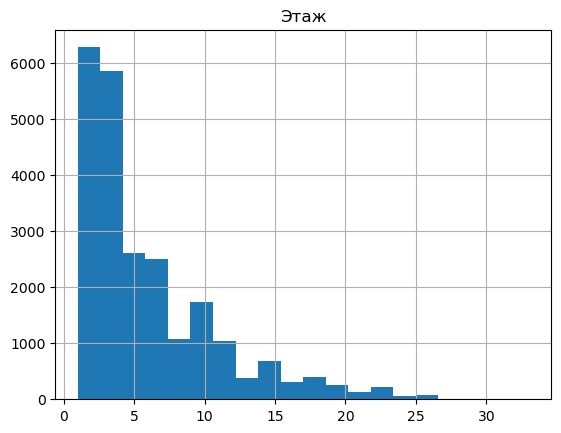

In [52]:
data['floor'].hist(bins=20)
plt.title('Этаж')
plt.show()

In [53]:
data.groupby('floors_total')['floors_total'].agg('count').sort_values(ascending=False).head()

floors_total
5     5788
9     3761
16    1376
12    1362
4     1200
Name: floors_total, dtype: int64

**Большая часть данных у нас квартиры до 5 этажа.Что не удивительно, т.к. большинство зданий в таблице - хрущевки**

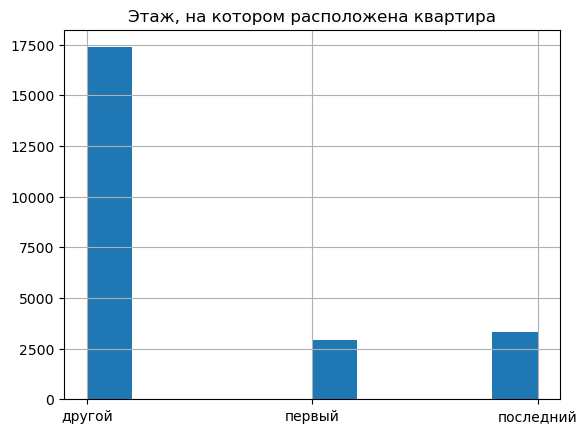

In [54]:
data['floor_type'].hist()
plt.title('Этаж, на котором расположена квартира')
plt.show()

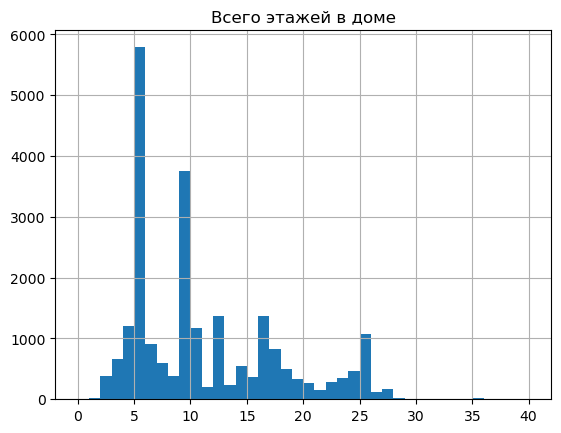

In [55]:
data['floors_total'].hist(bins=40, range=(0, 40))
plt.title('Всего этажей в доме')
plt.show()

In [56]:
data.groupby('floors_total')['floors_total'].agg('count').sort_values(ascending=False).head()

floors_total
5     5788
9     3761
16    1376
12    1362
4     1200
Name: floors_total, dtype: int64

**Выведем график общной этажности дома. В топ 5 у нас вошли - 5, 9, 16, 12, 4**

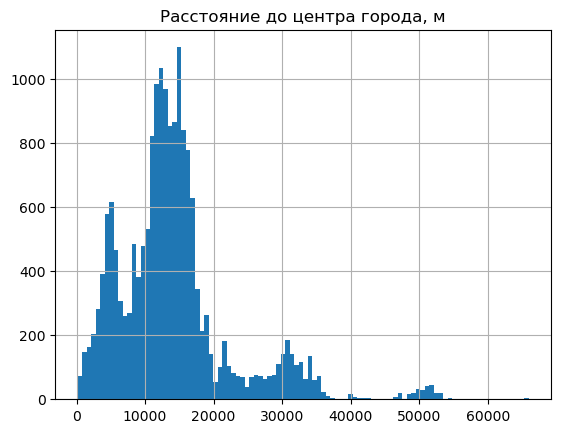

In [60]:
data['cityCenters_nearest'].hist(bins=100)
plt.title('Расстояние до центра города, м')
plt.show()

**Удаленность от цента в основном в 10 км. и второй пик 5. км.**

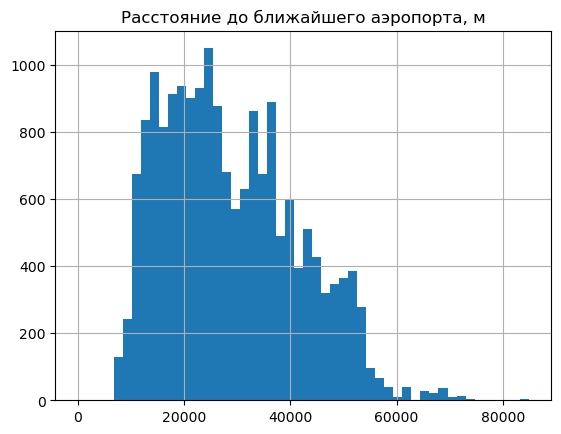

In [61]:
data['airports_nearest'].hist(bins=50)
plt.title('Расстояние до ближайшего аэропорта, м')
plt.show()

**удаленность от аэрапорта более менее ровномерная начиная с 15. до 25. км. т.к. аэропорт находится в 15 км. от центра, данное распределение адекватное.**

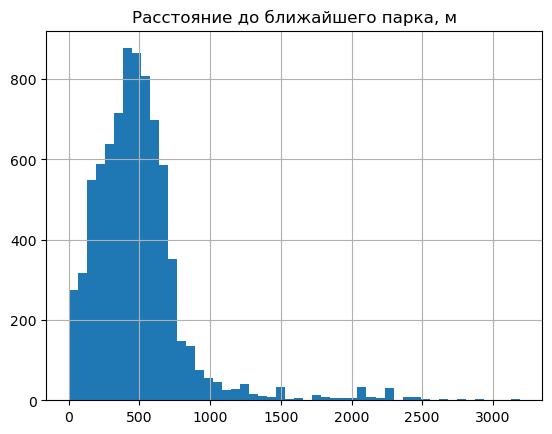

In [62]:
data['parks_nearest'].hist(bins=50)
plt.title('Расстояние до ближайшего парка, м')
plt.show()

**У большинства квартир в 500 м. есть парк!**

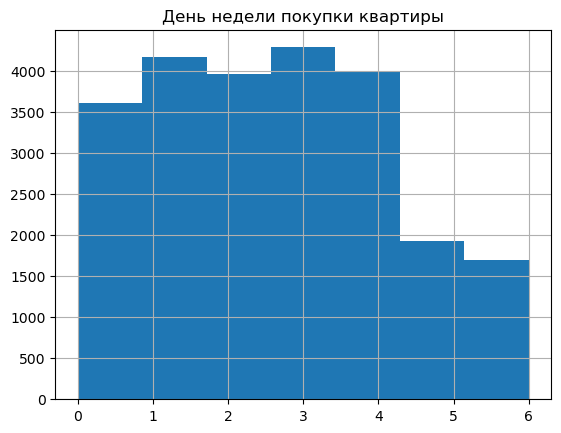

In [65]:
data['number_week'].hist(bins=7)
plt.title('День недели покупки квартиры')
plt.show()

**По выходным продажа квартир падает почти в 2 раза!**

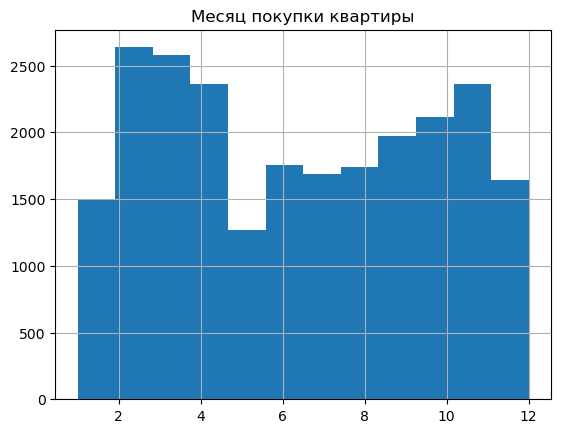

In [66]:
data['month'].hist(bins=12)
plt.title('Месяц покупки квартиры')
plt.show()

**В мае меньше прослеживается спад покупок на квартир. Интересно, связано ли это с майскими праздниками. 
2й несезонный месяц для риэлторов - январь. Скорее всего первые 10 дней выходных тоже влияют на покупки.
3й месяц - декабрь.**

**Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Построим гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"**

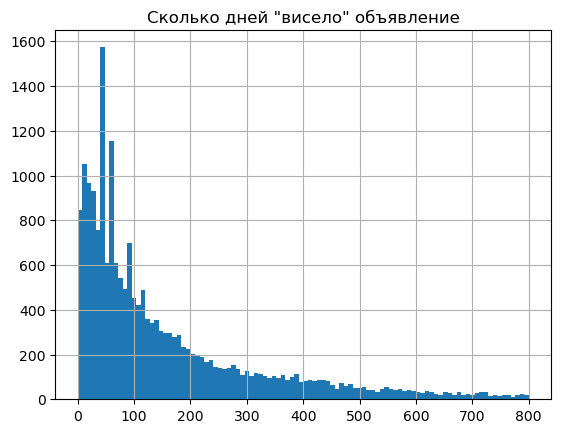

In [67]:
data['days_exposition'].hist(bins=100, range=(0, 800))
plt.title('Сколько дней "висело" объявление')
plt.show()

**Есть выбивающиеся значения. Достаточно много квартир продаются в первые 1,5-2 месяца!**

*В нашем графике есть объявления, которые висят от 1 до 2 и больше лет. 
Объявлений сроком от 1 года сильно меньше, но они есть. Такие значения, можем считать аномальными.*


In [68]:
data['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [69]:
data.groupby('rooms')['rooms'].agg('count')

rooms
0      194
1     8015
2     7913
3     5795
4     1177
5      325
6      104
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

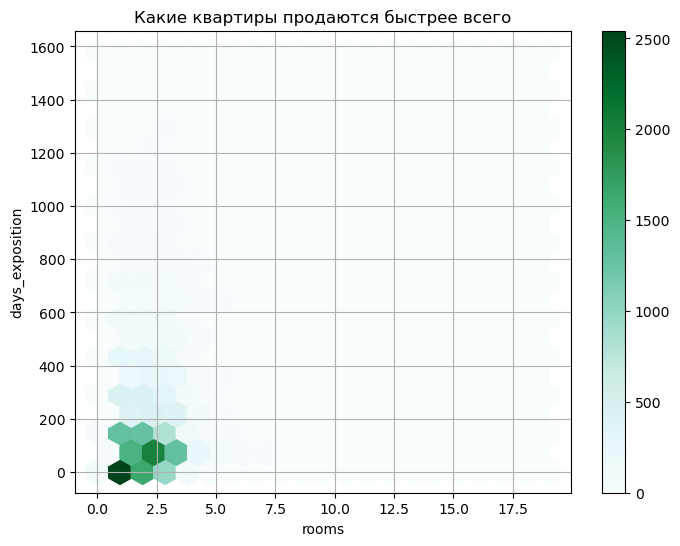

In [70]:
data.plot(x='rooms', y='days_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Какие квартиры продаются быстрее всего')
plt.show()

**В среднем квартира продается за 180 дней. Но среднее не всегда верно показывает картину. 
Медианый показатель 95 дней. 
У нас в таблице очень много 1-2 комнатных квартир. Логично прелположить, что это именно эти квартиры продаются быстро.
Остальные 5 и больше комнат - висят в продаже дольше.**

**Построим график hexbin.
Как и предположили в самой густой зоне у нас 1-2 комнатные квартиры, которые продаются быстро.**



**Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта? Построим графики, которые покажут зависимость цены от указанных ниже параметров.**
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

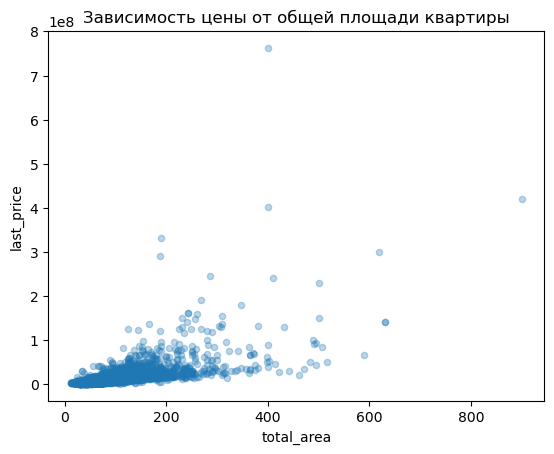

0.6535810085611219

In [71]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.title('Зависимость цены от общей площади квартиры')
plt.show()

data['total_area'].corr(data['last_price'])


**коэффициент корреляции Пирсона между общей площадью и ценой 0.65. по шкале Чеддока средняя сила связи. 
По графику можем заметить, что чем больше площадь, больше и цена на квартиру.
Есть выбивающиеся значения. На данном этапе, предположим, что на их цену влияет что-то еще (местоположение, например)**

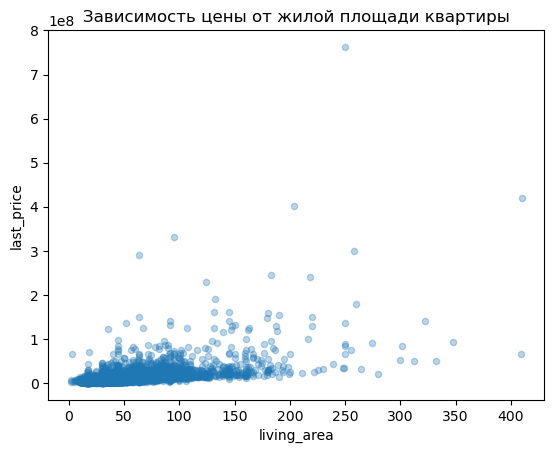

0.5560002107282805

In [72]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
plt.title('Зависимость цены от жилой площади квартиры')
plt.show()

data['living_area'].corr(data['last_price'])

**коэффициент корреляции Пирсона между общей площадью и ценой 0.56. по шкале Чеддока средняя сила связи.
Данный график очень напоминает предыдущий. На нем также наблюдается зависимость между жилой площадью и ценой квартиры.**

**до 100 кв.м. точки у нас расположены более плотно. После 100 кв.м. зависимость не такая сильная.**

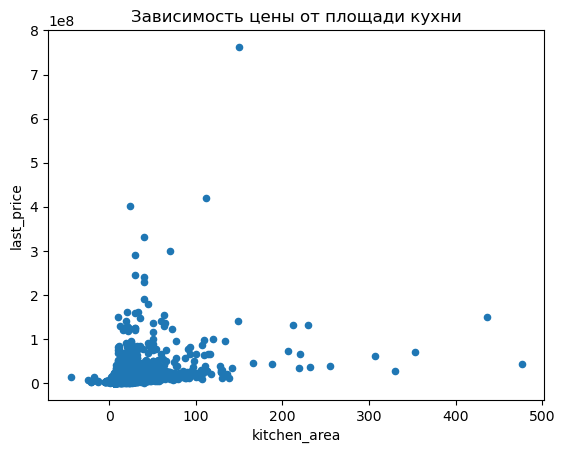

0.40420120506911417

In [73]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')
plt.title('Зависимость цены от площади кухни')
plt.show()

data['kitchen_area'].corr(data['last_price'])


**коэффициент корреляции Пирсона между общей площадью и ценой 0.4. по шкале Чеддока умеренная сила связи. 
На графике между площадью кухни и ценой квартиры наблюдается зависимость.
Но график отличается от предыдущих. Наблюдается всплеск около нуля т.е. квартиры с маленькой площадью кухней не обязательно дешевле, а с большой площалью не обязательно дороже**

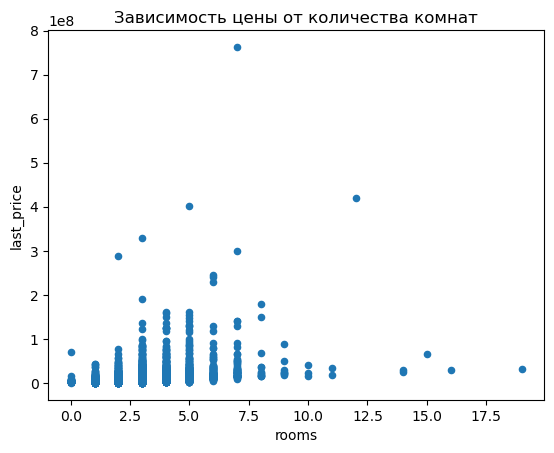

0.36312416659844765

In [74]:
data.plot(x='rooms', y='last_price', kind='scatter')
plt.title('Зависимость цены от количества комнат')
plt.show()
data['rooms'].corr(data['last_price'])

**коэффициент корреляции Пирсона между количеством комнат и ценой 0.36. Ниже, чем у показателей выше.**

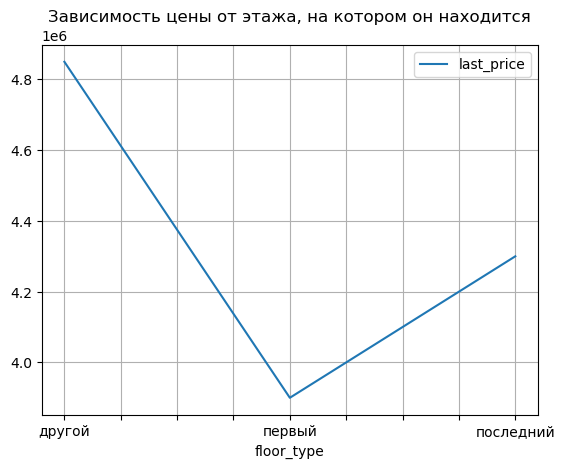

In [75]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True)
plt.title('Зависимость цены от этажа, на котором он находится')
plt.show()

**Между типами этажей есть зависимость!
Дороже всего стоит квартира их типа - другой.
затем последний этаж.
И дешевле всего квартиры на первом этаже.**

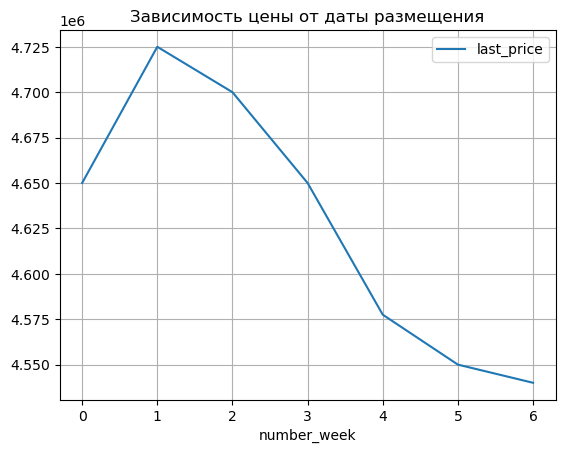

In [76]:
#Дата размещения - день
data.pivot_table(index='number_week', values='last_price', aggfunc='median').plot(grid=True)
plt.title('Зависимость цены от даты размещения')
plt.show()

**По графику можно проследить, что во вторник были выложены больше квартир.**

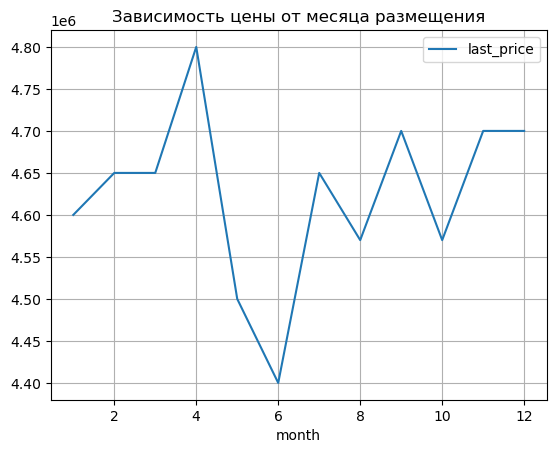

In [77]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True)
plt.title('Зависимость цены от месяца размещения')
plt.show()

**Дорогие квартиры чаще выкладывают на продажу в начале года. 
К лету наблюдается спад цены.**

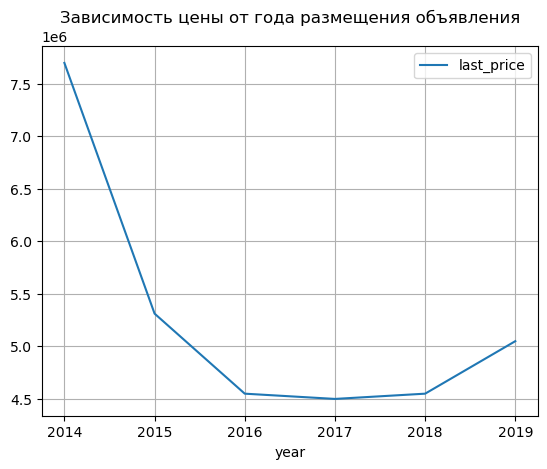

In [78]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True)
plt.title('Зависимость цены от года размещения объявления')
plt.show()

**На графике можем отследить спад цены на квартиры после 2014 года.
Выдвинем несколько гипотез:**
- что это может быть связано с курсом доллара;
- В 2014 году могло быть недостаточно наблюдений.


**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

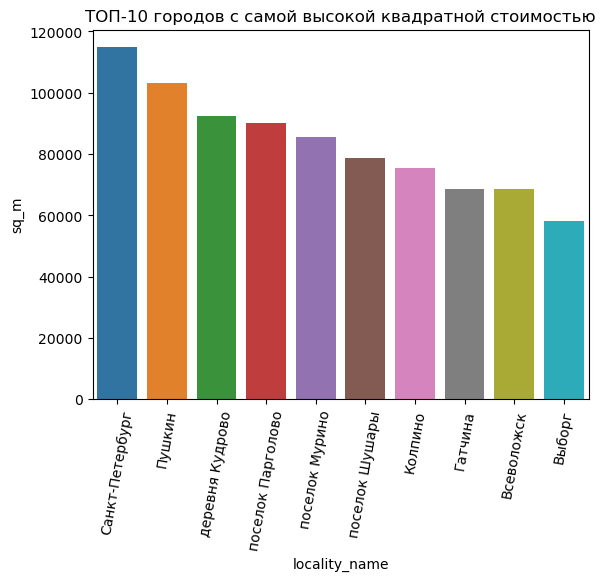

In [79]:
data['locality_name'].value_counts().head(10)
name_city = ["Санкт-Петербург", "поселок Мурино", "поселок Шушары", "Всеволожск", "Пушкин", "Колпино", "поселок Парголово", "Гатчина", "деревня Кудрово", "Выборг"]
top10 = data.query('locality_name in @name_city').pivot_table(index='locality_name', values='sq_m').sort_values(by='sq_m', ascending=False)
sns.barplot(x = top10.index, y = "sq_m", data = top10)
plt.xticks(rotation=80)
plt.title('ТОП-10 городов с самой высокой квадратной стоимостью')
plt.show()


**Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.**

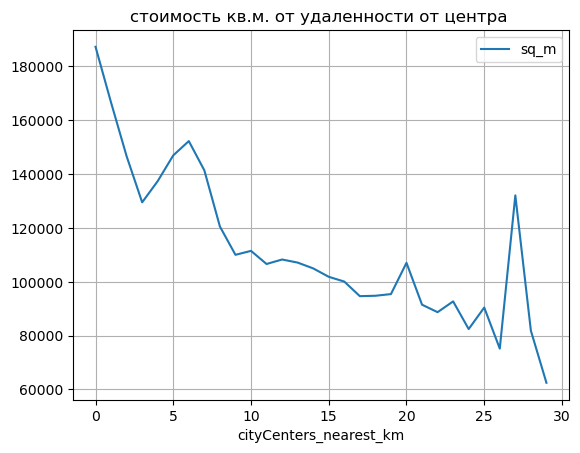

In [80]:
name = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='sq_m').plot(grid=True)
plt.title('стоимость кв.м. от удаленности от центра ')
plt.show()

**Посмотрим на результат в графике.
Дороже всего квартиры в центре Питера, затем небольшой скачок в 6 км и 27 км от центра. в 27 км от центра Питера находится Петергоф...**

### Общий вывод

В данном исследовании мы рассмотрели архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, и выявили интересные особенности!

У нас в таблице очень много 1-2 комнатных квартир. Большинство из этих объявлений о продаже снимаются в течении 2-3 месяцев.

Цена на квартиры зависит от города, удаленности от центра, общей площади, этажа, года продажи. 

Самые дорогие квартиры в центре Санкт-Петербурга, находящиеся ни на первом и ни на последнем этажах, с большой жилой площадью.

Мы отследить спад цены на квартиры после 2014 года и предположили, что это может быть связано с:
- курсом доллара;
- В 2014 году могло быть недостаточно наблюдений.